In [2]:
import blenderproc as bproc
import argparse
import numpy as np
import bpy
import time

from pathlib import Path

In [14]:
loaded = np.load('./pose_exp/mainshell.npz')
print(loaded['Rotation'])
print(loaded['Z_offset'])

[[[-9.94812489e-01  1.01725891e-01 -2.30308888e-06]
  [-1.01725891e-01 -9.94812489e-01 -2.59330409e-06]
  [-2.55494774e-06 -2.34556751e-06  1.00000000e+00]]

 [[-7.37068594e-01 -6.75817966e-01 -1.42762028e-05]
  [-6.75817966e-01  7.37068594e-01  2.35547832e-05]
  [-5.39620441e-06  2.70096043e-05 -1.00000000e+00]]

 [[ 4.41901594e-01  8.97063553e-01 -6.71270163e-06]
  [-8.97063553e-01  4.41901594e-01  4.27409441e-06]
  [ 6.80048788e-06  4.13299085e-06  1.00000000e+00]]

 [[ 4.69777554e-01 -8.82784843e-01 -8.46604416e-06]
  [-8.82784843e-01 -4.69777554e-01 -1.38482092e-05]
  [ 8.24783092e-06  1.39792737e-05 -1.00000000e+00]]

 [[-9.91547465e-01 -1.29744336e-01  4.54920041e-07]
  [ 1.29744336e-01 -9.91547465e-01  2.51322581e-06]
  [ 1.24998024e-07  2.55100599e-06  1.00000000e+00]]

 [[-2.51273453e-01  1.34770617e-05 -9.67916131e-01]
  [-9.67916131e-01 -3.23586792e-05  2.51273453e-01]
  [-2.79340584e-05  1.00000000e+00  2.11755414e-05]]

 [[ 9.42077160e-01 -3.35396171e-01  7.11280208e-08]


In [15]:
loaded = np.load('./pose_exp/topshell.npz')
print(loaded['Rotation'])
print(loaded['Z_offset'])

[[[-9.05272663e-01 -4.24830973e-01 -2.33764993e-04]
  [ 4.24831003e-01 -9.05272365e-01 -7.45878380e-04]
  [ 1.05251245e-04 -7.74533954e-04  9.99999702e-01]]

 [[-3.96279216e-01 -9.18129504e-01 -9.77324205e-04]
  [ 9.18130040e-01 -3.96279126e-01 -3.07381648e-04]
  [-1.05077030e-04 -1.01911963e-03  9.99999464e-01]]

 [[-9.85675037e-01 -1.68655589e-01  1.43382014e-04]
  [-1.68655649e-01  9.85674739e-01 -7.32463552e-04]
  [-1.77939710e-05 -7.46153237e-04 -9.99999702e-01]]

 [[ 1.02513224e-01  9.94731307e-01 -7.99261499e-04]
  [ 9.94731665e-01 -1.02513246e-01  1.38348059e-05]
  [-6.81729798e-05 -7.96468987e-04 -9.99999702e-01]]

 [[-4.70916450e-01  8.82177591e-01 -6.17421931e-04]
  [ 8.82177830e-01  4.70916241e-01 -4.36511153e-04]
  [-9.43263367e-05 -7.50236213e-04 -9.99999702e-01]]

 [[-2.92089224e-01 -9.56391037e-01 -2.02696363e-04]
  [ 9.56391096e-01 -2.92089254e-01  3.10407922e-05]
  [-8.88925642e-05 -1.84790319e-04  1.00000000e+00]]

 [[ 9.99732316e-01  2.31369231e-02  8.22752045e-05]


In [16]:
loaded = np.load('./pose_exp/insert_mold.npz')
print(loaded['Rotation'])
print(loaded['Z_offset'])

[[[-1.13289893e-01  9.09723639e-01  3.99460047e-01]
  [ 9.93551314e-01  1.01864487e-01  4.97941896e-02]
  [ 4.60815709e-03  4.02525216e-01 -9.15397286e-01]]

 [[ 1.82127237e-01  8.99744451e-01  3.96597475e-01]
  [ 9.83264625e-01 -1.68505192e-01 -6.92582503e-02]
  [ 4.51400457e-03  4.02574062e-01 -9.15376306e-01]]

 [[-9.97569442e-01 -6.96784928e-02  2.53177510e-04]
  [ 6.96786940e-02 -9.97569084e-01  8.77527578e-04]
  [ 1.91417261e-04  8.93035787e-04  9.99999583e-01]]

 [[ 3.63320023e-01 -9.31664407e-01  9.69045213e-05]
  [ 9.31664348e-01  3.63319993e-01 -2.82745255e-04]
  [ 2.28216348e-04  1.93009517e-04  9.99999940e-01]]

 [[ 7.70567060e-01  5.82017779e-01  2.59772450e-01]
  [ 6.37343168e-01 -7.06508636e-01 -3.07634950e-01]
  [ 4.48247232e-03  4.02617544e-01 -9.15357292e-01]]

 [[ 3.85320842e-01  8.43994021e-01  3.73097718e-01]
  [ 9.22771573e-01 -3.54398817e-01 -1.51307896e-01]
  [ 4.52241255e-03  4.02586043e-01 -9.15371001e-01]]

 [[ 8.62825274e-01  5.05499661e-01 -1.60709815e-03]


In [59]:
classes = ['mainshell', 'topshell', 'insert_mold']

R = []
Z = []
Z_freq = []
for catogory in classes:
    loaded = np.load(f"./pose_tmp/{catogory}.npz")
    R_temp = loaded['Rotation']
    Z_temp = loaded['Z_offset'].round(5)
    R.append(R_temp)
    Z.append(Z_temp)
    ## TODO(yangfei) Z_off - Thickness_of_tagboard

    Z_freq_temp = {}
    for item in Z_temp:
        Z_freq_temp[item] = Z_freq_temp.get(item, 0) + 1
    
    total = sum(Z_freq_temp.values())
    for key, value in Z_freq_temp.items():
        Z_freq_temp[key] = round((Z_freq_temp[key] / total), 2)
    Z_freq.append(Z_freq_temp)
    
    
    print(f"{catogory} frequency dic is ", Z_freq[-1])
    print(f"{catogory} Min Z value = ", Z_temp.min())
    print(f"{catogory} Max Z value = ", Z_temp.max(), '\n')


mainshell frequency dic is  {0.0135: 0.95, 0.01653: 0.05}
mainshell Min Z value =  0.0135
mainshell Max Z value =  0.01653 

topshell frequency dic is  {0.01419: 0.75, 0.01416: 0.25}
topshell Min Z value =  0.01416
topshell Max Z value =  0.01419 

insert_mold frequency dic is  {0.01326: 0.45, 0.01407: 0.55}
insert_mold Min Z value =  0.01326
insert_mold Max Z value =  0.01407 



In [50]:
Z_freq

[{0.01326: 9, 0.01407: 11},
 {0.01326: 9, 0.01407: 11},
 {0.01326: 9, 0.01407: 11}]

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

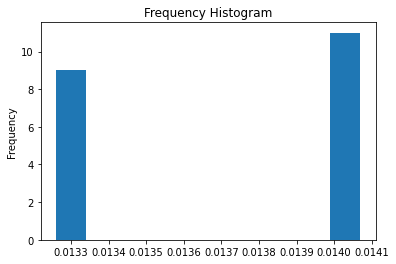

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(Z_insert, bins=10)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')